In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Reshape
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier

import tensorflow as tf

2022-10-21 01:09:35.256636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-21 01:09:35.379266: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-21 01:09:35.967244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moises/workspace/devel/lib
2022-10-21 01:09:35.967341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.

In [2]:
tf.config.experimental.list_physical_devices('GPU')

2022-10-21 01:09:36.969640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-21 01:09:36.999925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moises/workspace/devel/lib
2022-10-21 01:09:36.999944: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[]

In [3]:
size = 5000
df = pd.read_csv('data/dataset_outer.csv')
pred_info = df[len(df)-60:]

In [4]:
df = df[len(df)-size-60:len(df)-60]
df = df.dropna(axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
df.index = df.Dia
df.drop(['Dia'], axis=1, inplace=True)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_scaled = scaler.fit_transform(df.values)

In [6]:
x = []
y = []

for i in range(60, dataset_scaled.shape[0]-20):
    x.append(dataset_scaled[i-60:i,:])
    y.append(dataset_scaled[i:i+20,:])

x, y = np.array(x), np.array(y)

In [7]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [11]:
x.shape, y.shape

((4920, 60, 391), (4920, 20, 391))

In [12]:
input_shape = (x.shape[1],x.shape[2])
output_shape = (y.shape[1], y.shape[2])
num_el = output_shape[0] * output_shape[1]

model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=input_shape))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=num_el))
model.add(Reshape(output_shape))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/100


2022-10-21 01:20:05.629048: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 323091120 exceeds 10% of free system memory.
2022-10-21 01:20:05.828276: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 107697040 exceeds 10% of free system memory.


 52/108 [=============>................] - ETA: 3s - loss: 0.0739 - accuracy: 0.0049

KeyboardInterrupt: 

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            88400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [ ]:
model_name = 'LSTM_2'
model.save('models/' + model_name + '/model')

INFO:tensorflow:Assets written to: models/LSTM_2/model/assets


INFO:tensorflow:Assets written to: models/LSTM_2/model/assets


In [ ]:
history.history

{'loss': [0.051760636270046234,
  0.013445491902530193,
  0.01030648685991764,
  0.008215355686843395,
  0.00686012813821435,
  0.006864083465188742,
  0.006128906738013029,
  0.005895860027521849,
  0.005601079203188419,
  0.005416336003690958,
  0.005216640420258045,
  0.005467000417411327,
  0.00530289439484477,
  0.004885569214820862,
  0.004899919964373112,
  0.00465020164847374,
  0.004469988401979208,
  0.004349671769887209,
  0.004572221077978611,
  0.004240323789417744,
  0.0041704666800796986,
  0.004072855692356825,
  0.0038380594924092293,
  0.0037873024120926857,
  0.0037940149195492268,
  0.003692957339808345,
  0.0036157548893243074,
  0.003544487990438938,
  0.003660036949440837,
  0.0036011431366205215,
  0.0035191497299820185,
  0.003635709872469306,
  0.0034437822178006172,
  0.003299339674413204,
  0.00326951639726758,
  0.0033019399270415306,
  0.003292844630777836,
  0.0032841654028743505,
  0.00317307747900486,
  0.0032612180802971125,
  0.0031244924757629633,
  

In [ ]:
predicted_stock_price = model.predict(x_test)

24/24 [==============================] - 2s 26ms/step


In [ ]:
y_test.shape, predicted_stock_price.shape

((739, 20, 391), (739, 20, 391))

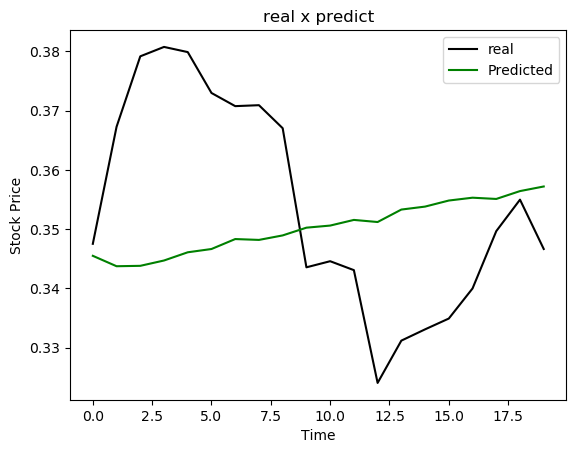

In [ ]:
plt.plot(y_test[411,:,5], color = 'black', label = 'real')
plt.plot(predicted_stock_price[411,:,5], color = 'green', label = 'Predicted')
plt.title('real x predict')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()